In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
most_recent_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the data set: {most_recent_date_str[0]}")

The most recent date in the data set: 2017-08-23


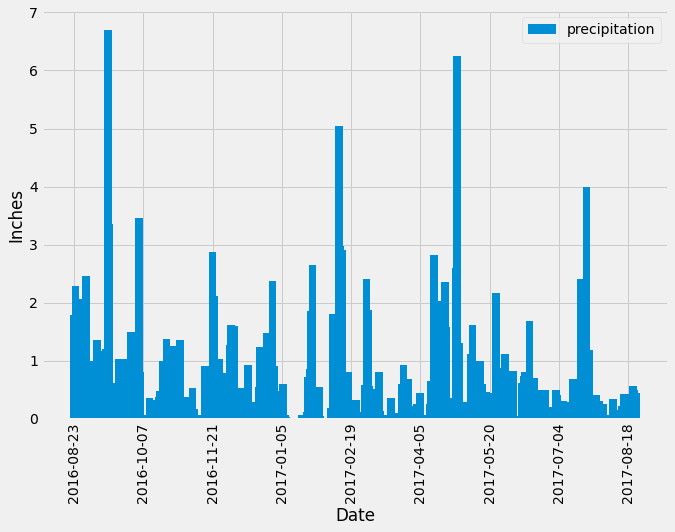

In [68]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.datetime.strptime(most_recent_date_str[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
recent_date_one_year_past = dt.date(most_recent_date.year -1, most_recent_date.month, most_recent_date.day)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
result = session.query(*sel).\
    filter(Measurement.date >= recent_date_one_year_past).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(result, columns=["Date", "Precipitation"])
precipitation_df = precipitation_df.set_index("Date")

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(["Date"], ascending=True)
precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

x_axis = precipitation_df.index.tolist()
y_axis = precipitation_df['Precipitation'].tolist()

plt.figure(figsize=(10,7))
plt.bar(x_axis, y_axis, width = 5, align="center",label='precipitation')

major_ticks = np.arange(0,400,45)
plt.xticks(major_ticks, rotation=90)

plt.xlabel("Date")
plt.ylabel("Inches")

plt.legend()
plt.show()

In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()